In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

import time
import copy
!pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score, precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/AI India/data/Sample_points.csv"
data = pd.read_csv(data_path)
df = data.copy()

In [4]:
df.drop(columns="OBJECTID", axis = 1, inplace= True)
df.drop(columns="ORIG_FID", axis = 1, inplace= True)
df.drop(columns="Id", axis = 1, inplace= True)



df.loc[df['Class_name']=='Agriculture', 'Class_name'] = 1
df.loc[df['Class_name']=='Barren_land', 'Class_name'] = 2
df.loc[df['Class_name']=='Builtup', 'Class_name'] = 3
df.loc[df['Class_name']=='Danse_Forest', 'Class_name'] = 4
df.loc[df['Class_name']=='Fallow_land', 'Class_name'] = 5
df.loc[df['Class_name']=='Sparse_forest', 'Class_name'] = 6
df.loc[df['Class_name']=='Waterbody', 'Class_name'] = 7

In [5]:
df

,Class_name,POINT_X,POINT_Y
0,1,599348.6366,2207930.196
1,1,599328.2133,2208075.224
2,1,598949.2685,2208382.371
3,1,597708.0247,2209058.754
4,1,597431.0999,2208983.332
...,...,...,...
2397,4,903719.5296,1653655.582
2398,4,904177.9597,1651411.815
2399,4,904183.6167,1650335.302
2400,4,904290.3335,1649776.499


In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(df.shape)
print(X.shape)
print(y.shape)

(2402, 3)
(2402, 2)
(2402,)


In [28]:
import matplotlib.pyplot as plt
data = y[1:].to_numpy() # neglect first pixel...
data = data.reshape((49,49))

data = data.astype(float)

In [29]:
data.dtype

dtype('float64')

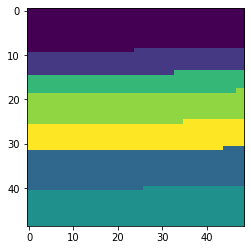

In [30]:
plt.imshow(data)
plt.show()

In [7]:
df.groupby("Class_name").count()

,POINT_X,POINT_Y
Class_name,,
1,466,466
2,254,254
3,423,423
4,415,415
5,210,210
6,331,331
7,303,303


In [ ]:
y=y.astype('int') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(y_train)
label_test = to_categorical(y_test)
label_test.shape

(793, 8)

# DL


In [ ]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import keras.models
from keras.layers import Activation
import tensorflow as tf

import pandas as pd
import torch as t
import torch.nn as nn

import matplotlib.pyplot as plt 

!nvidia-smi

Fri Jul  2 08:40:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    33W /  70W |    446MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model = Sequential()
model.add(Dense(1000, input_dim = X_train.shape[1], activation="relu"))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(8, activation = 'sigmoid'))

# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

model.summary()
# Fit the model


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_35 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 8008      
Total params: 1,012,008
Trainable params: 1,012,008
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,label_train, epochs=15, batch_size=10,  verbose=2)

Epoch 1/15
161/161 - 1s - loss: 60545.2539 - accuracy: 0.1840
Epoch 2/15
161/161 - 0s - loss: 6868.4102 - accuracy: 0.2119
Epoch 3/15
161/161 - 0s - loss: 3769.9233 - accuracy: 0.2287
Epoch 4/15
161/161 - 0s - loss: 1438.9744 - accuracy: 0.2256
Epoch 5/15
161/161 - 0s - loss: 147.7114 - accuracy: 0.1734
Epoch 6/15
161/161 - 0s - loss: 2.0239 - accuracy: 0.1715
Epoch 7/15
161/161 - 0s - loss: 2.0032 - accuracy: 0.1871
Epoch 8/15
161/161 - 0s - loss: 1.9885 - accuracy: 0.1871
Epoch 9/15
161/161 - 0s - loss: 1.9770 - accuracy: 0.1871
Epoch 10/15
161/161 - 0s - loss: 1.9679 - accuracy: 0.1871
Epoch 11/15
161/161 - 0s - loss: 1.9605 - accuracy: 0.1871
Epoch 12/15
161/161 - 0s - loss: 1.9544 - accuracy: 0.1871
Epoch 13/15
161/161 - 0s - loss: 1.9493 - accuracy: 0.1871
Epoch 14/15
161/161 - 0s - loss: 1.9452 - accuracy: 0.1871
Epoch 15/15
161/161 - 0s - loss: 1.9417 - accuracy: 0.1871


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv1D, Flatten, Dense, Dropout 
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np

In [ ]:
output = label_train.shape[1]
feat_cnn = np.expand_dims(X_train, axis=2)
sequence_size = X_train.shape[1]
n_features=1
validation_split =0.2

In [ ]:
model = Sequential([
Conv1D(
          filters=1,
          kernel_size=4,
          strides=1,
          input_shape=(sequence_size, 1),
          padding="same",
          activation="relu"
      ),
      Flatten(),
      Dropout(0.5),
      Dense(
          output,
          activation="sigmoid",
          name="output",
      )
      ])
optimizer = Adam(lr=0.001)
      # Compiling the model
model.compile(
          optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
      )
model.summary()


  #model.fit(training_data['inputs'],training_data['targets'], epochs = 100,validation_split=validation_split, verbose=2)
model.fit(feat_cnn, label_train,  epochs=100, validation_split=validation_split, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 1)              5         
_________________________________________________________________
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 2)                 0         
_________________________________________________________________
output (Dense)               (None, 8)                 24        
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 - 28s - loss: 66.3322 - accuracy: 0.1826 - val_loss: 0.6783 - val_accuracy: 0.1925
Epoch 2/100
41/41 - 0s - loss: 0.6714 - accuracy: 0.1709 - val_loss: 0.6640 - val_accuracy: 0.1925
Epoch 3/100
41/41 - 0s - loss: 0.6574 - accuracy: 0.170